In [504]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.constants import N_A
import math

In [505]:
kon = 1e5
koff = 1e-4
Target_cell_number = 2e5
well_size = 150e-6
t_end = (1e-2)**(-3)
t = np.geomspace(10**(3), t_end, 5000)
tspan = [10**(3), t_end]

Ainit = 1e-9
rtot = 1e5
Atot = well_size*N_A*Ainit/Target_cell_number
k = Ainit*kon
beta=1
k2=1e2


In [506]:
def model(t, z):

    dA1 = 2*(k/k2)*(1-beta*(z[0]+2*z[1]))*(1-z[0]-z[1]) - (koff/k2)*z[0] - (1-beta*(z[0]-2*z[1]))*z[0] + 2*(koff/k2)*z[1]
    dA2 = (1-beta*(z[0]-2*z[1]))*z[0] - 2*(koff/k2)*z[1]

    return [dA1, dA2]

epsilon = 1e-2
tau = k2*t*epsilon
delta = 1e-6
#sns.set_theme()

/var/folders/qf/lh9kspxj3zx7v12f8f3xdfbw0000gn/T/ipykernel_847/2767394753.py:11: RuntimeWarning: invalid value encountered in true_divide
  sol = z.y[0]/z.y[1]


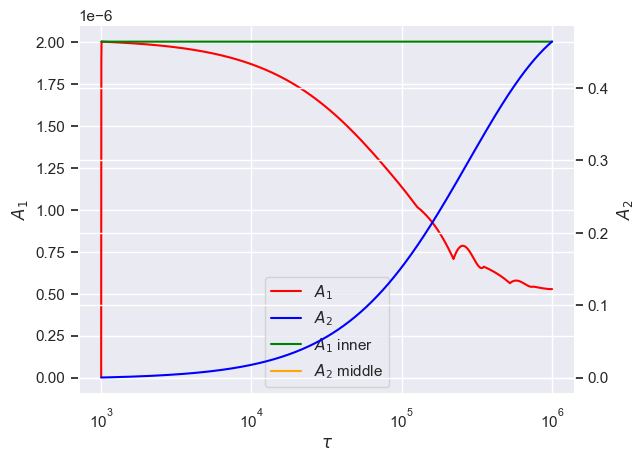

In [507]:
fig, ax = plt.subplots()
z = solve_ivp(model, tspan, [0, 0], method='Radau', t_eval=t)
A1 = ax.plot(t, z.y[0], 'red', label = r'$A_1$')
x = (1 - (1)*np.exp((2/2)*2*(epsilon**3)*t))/(1 - (2)*np.exp((2/2)*2*(epsilon**3)*t))
A1_in  = ax.plot(t, 2*(epsilon**3)*(1 - np.exp(-t)), 'green', label = r'$A_1$' +  ' inner')
#A1_mid = ax.plot(t, 2*(epsilon**4)*(1+2*(epsilon**3)*t), 'purple', label = r'$A_1$' +  ' middle')
#A1_mid = ax.plot(t, (epsilon**3)*(((2*(1-x-2*x*(1-x))) +2*x)/(1-2*x)), 'purple', label = r'$A_1$' +  ' middle')
#A1_out = ax.plot(t, 2*(epsilon**3)*(1-np.exp(-2*(epsilon**4)*t)), 'black', label = r'$A_1$' +  ' out')
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$A_1$')
sol = z.y[0]/z.y[1]

ax2 = ax.twinx()
A2 = ax2.plot(t, z.y[1], 'blue', label =r'$A_2$')
#A2_in = ax2.plot(t, 2*(epsilon**3)*(t + np.exp(-t) - 1), 'purple', label = r'$A_2$' +  ' inner')
#A2_mid = ax2.plot(t, 2*(epsilon**4)*t , 'orange', label = r'$A_2$' +  ' middle')
#A2_mid = ax2.plot(t, x, 'orange', label = r'$A_2$' +  ' middle')
#A2_out = ax2.plot(t, 1-np.exp(-2*(epsilon**4)*t), 'brown', label = r'$A_2$' +  ' out')
ax2.set_ylabel(r'$A_2$')

lns = A1 + A2 + A1_in + A2_mid
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.xscale('log')
plt.show()

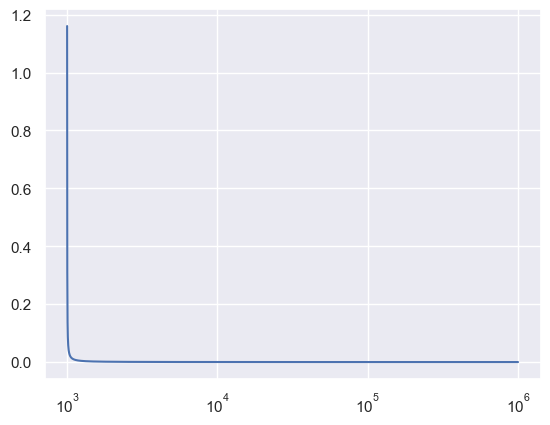

In [512]:
plt.plot(t, sol)
plt.xscale('log')

plt.show()

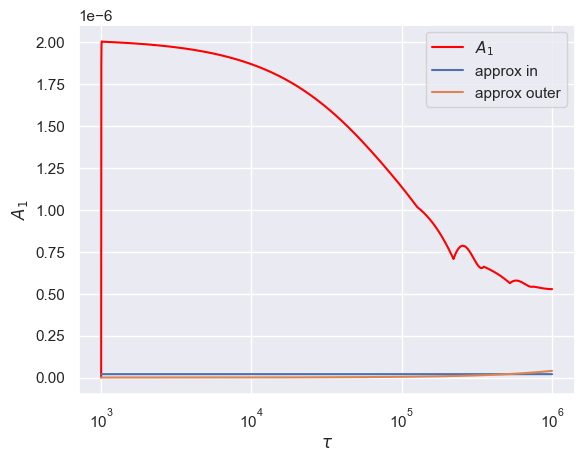

In [509]:
z = solve_ivp(model, tspan, [0, 0], method='Radau', t_eval=t)
sns.set_theme()
plt.plot(t, z.y[0], 'red', label=r'$A_1$')
#plt.plot(t, 2*t*epsilon, label='approx')
#x = (2 - (2)*np.exp((3/2)*2*(epsilon**3)*t))/(1 - (4)*np.exp((3/2)*2*(epsilon**3)*t))
plt.plot(t, 2*(epsilon**4)*(1-np.exp(-t)), label = 'approx in')
#plt.plot(t, (epsilon**3)*((2*(1-(x) -2*(x) +2*((x)**2)) + 2*(x))/(1-2*(x))))
#plt.plot(t, 2*(epsilon**4)*(1+2*(epsilon**3)*t), label = 'approx middle')
#plt.plot(t, 2*(1e-6)*(np.ones_like(t)))
#plt.plot(t, 1e-6*(2*((1)*(1-np.exp(-2*t*1e-6)) + np.exp(-2*t*1e-6))))
#plt.plot(t, 1e-6*(2*(delta*(1-np.exp(-2*t/1e6)) + 1*np.exp(-t/1e6))))
plt.plot(t, 2*(epsilon**3)*(1-np.exp(-2*(epsilon**4)*t)), label='approx outer')
plt.xlabel(r'$\tau$')
plt.legend(loc='best')
plt.xscale('log')
plt.ylabel(r'$A_1$')
plt.show()

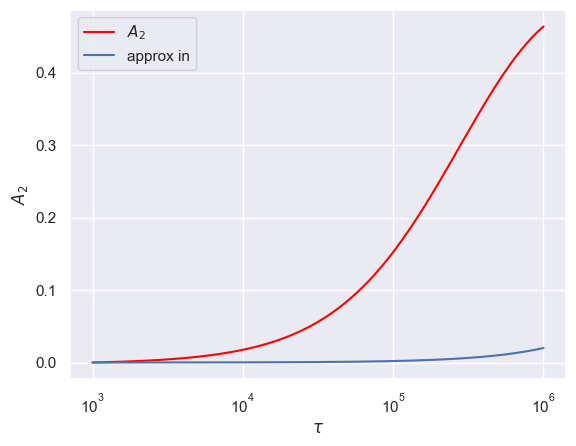

In [510]:
z = solve_ivp(model, tspan, [0, 0], method='Radau', t_eval=t)
plt.plot(t, z.y[1], 'red', label=r'$A_2$')
plt.plot(t, 2*(epsilon**4)*(t + np.exp(-t) - 1), label = 'approx in')
#plt.plot(t, 1-1*np.exp(-2*t/1e6))
#plt.plot(t, 2*(epsilon**4)*t , label='approx out')
#plt.plot(t, np.ones_like(t))
#plt.plot(t, 1-np.exp(-2*(epsilon**4)*t))
#plt.plot(t, (2 - (4/2)*np.exp((3/2)*2*(epsilon**3)*t))/(1 - (4)*np.exp((3/2)*2*(epsilon**3)*t)))
plt.ylabel(r'$A_2$')
plt.xlabel(r'$\tau$')
plt.legend(loc='best')
plt.xscale('log')
plt.show()